In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ipywidgets import interact, DatePicker

In [3]:
df = pd.read_csv('gold_clean.csv', index_col = 0)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 0 to 5701
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5693 non-null   datetime64[ns]
 1   Open      5693 non-null   float64       
 2   High      5693 non-null   float64       
 3   Low       5693 non-null   float64       
 4   Close     5693 non-null   float64       
 5   Volume    5693 non-null   int64         
 6   Currency  5693 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 355.8+ KB


### Manipulate View: Trực quan hoá giá vàng theo thời gian(có thể lựa chọn được khoảng thời gian trực quan)

Dữ liệu của về giá vàng của chúng ta rất lớn, nó là dữ liệu từ năm 2001-2022. Với lượng dữ liệu khổng lồ này thì quá lớn để xem hết một lần. Vì thế, để thuận tiện cho việc xem xét từng khoảng thời gian cụ thể từ đó có thể phân tích được giá vàng một cách tốt hơn, ta sẽ trực quan hoá giá khi `Close` theo thời gian. Thêm vào đó, ta sẽ thêm một chức năng đó là điều chỉnh được thời gian để xem xét dữ liệu một cách linh hoạt và chi tiết hơn.

In [5]:
def plot_gold_prices(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    plt.figure(figsize=(22, 9))
    sns.lineplot(x = 'Date', y = 'Close', data = new_df)
    plt.ylabel('Price Close (USD)')
    plt.title(f'Gold Prices from {start_date.strftime("%d-%m-%Y")} to {end_date.strftime("%d-%m-%Y")}')
    plt.show()


start = DatePicker(description = 'Start Date', value = df['Date'].min())
end = DatePicker(description = 'End Date', value = df['Date'].max())

interact(plot_gold_prices, start_date = start, end_date = end)

interactive(children=(DatePicker(value=Timestamp('2000-01-04 00:00:00'), description='Start Date', step=1), Da…

<function __main__.plot_gold_prices(start_date, end_date)>

c:\Users\KHUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\traitlets.py:697: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  silent = bool(old_value == new_value)


c:\Users\KHUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\traitlets.py:697: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  silent = bool(old_value == new_value)


Sau khi trực quan hoá, ta thấy giá vàng có sự biến động rất nhiều trong hơn 20 năm qua. Với việc xem được nhiều khoảng thời gian khác nhau có thể giúp ta thấy được đặc trưng của từng thời kì biến động giá vàng. Qua đó có thể xem xét dựa trên nhiều mốc thời gian khác nhau.

Để cho thấy được lợi ích của việc này, ta sẽ phân tích một chút giá vàng ở một mốc thời gian nào đó.

Những năm đầu của biểu đồ ta thấy giá vàng có xu hướng tăng nhưng rất chậm. Nhưng đến năm 2008, ta thấy giá vàng biến động rất mạnh. Và sau đợt biến động này thì giá vàng tăng rất nhanh. Ta sẽ phân tích giá vàng ở thời điểm này để xem có gì đặt biệt.

Ta sẽ chỉnh thời gian của biểu đồ từ thành từ tháng 1-2007 đến tháng 12-2009. 

- Giá vàng biến động rất ít ở năm 2007. 
- Vào cuối năm 2007 và đầu năm 2008 giá vàng tăng rất mạnh nhưng sau đó lại giảm rất sâu vào cuối năm.
- Đến năm 2009, giá vàng tăng trường một cách mạnh mẽ và đạt chỉnh ở cuối năm 2009 với giá 1200 USD.

Sự biến động mạnh mẽ này của giá vàng là không bình thường và nguyên nhân nào đã gây ra nó.

Sau khi tìm hiểu thì đây là cuộc khủng hoảng kinh tế ở Mĩ và lan rộng ra toàn cầu. 
- Ban đầu, vào năm 2007, giá vàng bắt đầu tăng lên và đạt đỉnh điểm vào tháng 3/2008. Tuy nhiên, khi khủng hoảng tài chính lan rộng, giá vàng đã bị ảnh hưởng và giảm đi vào tháng 10/2008.
- Sau đó, giá vàng đã tăng trở lại vào đầu năm 2009, khi nhu cầu đối với tài sản an toàn tăng cao, đặc biệt là trong bối cảnh suy thoái kinh tế. 

Tổng kết lại, trong thời kì khủng hoảng kinh tế từ năm 2007 đến năm 2009, giá vàng đã trải qua một diễn biến biến động lớn, từ đỉnh cao đầu năm 2008 đến đáy vào cuối năm 2008, rồi lại tăng trở lại trong năm 2009. Điều này phản ánh nhu cầu của nhà đầu tư và các nhà đầu tư cá nhân tìm kiếm các tài sản an toàn trong bối cảnh suy thoái kinh tế và sự bất ổn trên thị trường tài chính.

Qua sự phân tích trên, ta thấy rõ được sự tác động của nền kinh tế đến vàng. Do đó, thông qua phân tích giá vàng ta có thể có được nhiều cái nhìn khách quan hơn về nền kinh tế.

### Reduce (cũng không chắc đúng là reduce không nữa:<<): Phân tích giá vàng và lượng giao dịch trong thời gian diễn ra Đại dịch covid 19.

Trong 20 năm qua, ngoài cuộc khủng hoảng kinh tế kể trên, ta cũng còn một thời kì mà giá vàng cũng bị ảnh hưởng rất nhiều đó là Đại dịch covid 19.

<b>"Volume và giá vàng có ảnh hưởng đến nhau. Khi giá vàng tăng, thường có sự quan tâm và tham gia của các nhà đầu tư, do đó volume có thể tăng lên. Ngược lại, khi giá vàng giảm, các nhà đầu tư có thể giảm sự quan tâm và tham gia vào thị trường vàng, do đó volume cũng có thể giảm xuống." </b>  Chúng ta cùng xem thử những điều này có đúng với khoảng thời gian đại dịch không ??

Để thấy rõ được tác động của đại dịch ta sẽ phân tích dữ liệu trước dịch cho đến khi dịch ổn định (từ đầu năm 2019 đến cuối năm 2021). Ta sẽ trực quan hoá giá vàng (Close) và lượng vàng giao dịch (Volume) trong khoảng thời gian này để thấy được sự biến động.

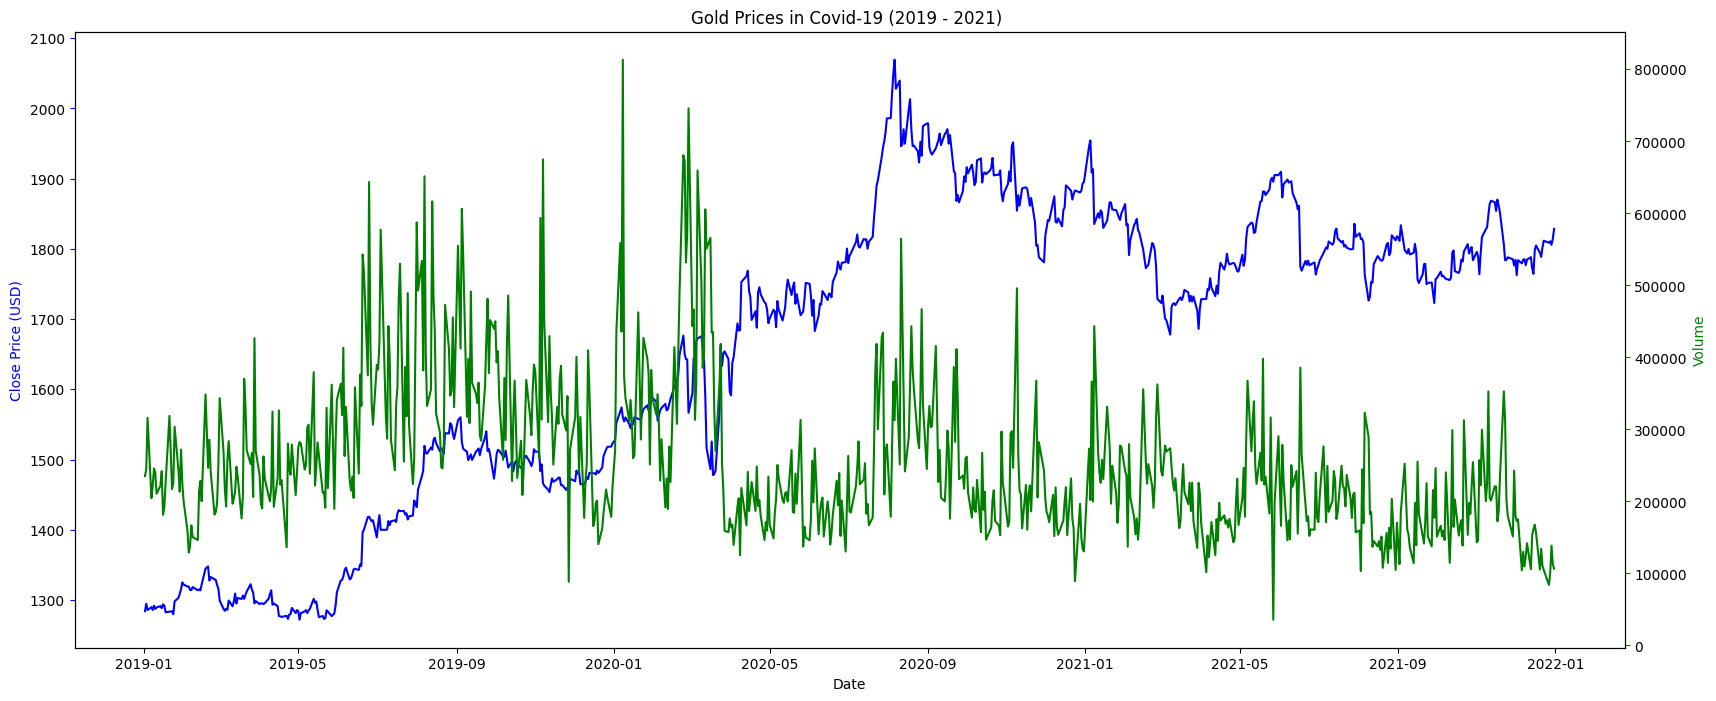

In [6]:
new_df = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2021-12-31')]

fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.plot(new_df['Date'], new_df['Close'], color = 'blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color = 'blue')
ax1.tick_params('y', color = 'blue')

ax2 = ax1.twinx()

ax2.plot(new_df['Date'], new_df['Volume'], color = 'green')
ax2.set_ylabel('Volume', color = 'green')
ax2.tick_params('y', color = 'green')
plt.title(f'Gold Prices in Covid-19 (2019 - 2021) ')
plt.show()

Sau khi trực quan hoá dữ liệu trên, ta thấy được một số điều đặc biệt ở dữ liệu này:
- Ở năm 2019, lượng giao dịch và gía vàng có biến động nhưng không mạnh. Khi giá vàng tăng ở nữa năm sau thì số lượng giao dịch cũng tăng. Có vẻ giả thuyết đã nêu ở trên khá đúng với năm 2019.
- Tiếp ở năm 2020, đây là năm đại dịch bùng phát. Ở những tháng đầu năm, giá vàng và lượng giao dịch đều tăng mạnh. Nhưng sau đó giá vàng tiếp tục tăng mạnh nhưng lượng giao dịch lại giảm xuốg mức rất thấp. Trong đại dịch diễn ra thì tình hình kinh tế thế giới biến đồng rất mạnh, do đó các nhà đầu tư đã mua vàng để tích trữ thay cho những tài sản khác. Do đó giá vàng tăng mạnh nhưng số lượng giao dịch không cao.
-  Ở năm 2021, giá vàng đã có dấu hiệu giảm nhẹ và biến động ít hơn nhưng lượng giao dịch vẫn không tăng mạnh. Có lẻ nguyên nhân là do tình hình dịch bệnh lúc này đã được kiểm soát nhưng chưa thật sự triệt.

Qua sự phân tích ở trên, ta có thể thấy rằng vàng là một trong những tài sản an toàn được nhiều nhà đầu tư đánh giá cao. Nhờ đó khi có biến cố gì lớn tác động đến nền kinh tế thì giá vàng và lượng giao dịch sẽ có sự biến động rất mạnh.